In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree
from IPython.display import display
plt.style.use('dark_background')

In [2]:
data = pd.read_csv("bank-additional-full.csv")
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   highschool      41188 non-null  object 
 4   education       41188 non-null  object 
 5   default         41188 non-null  object 
 6   housing         41188 non-null  object 
 7   loan            41188 non-null  object 
 8   contact         41188 non-null  object 
 9   month           41188 non-null  object 
 10  day_of_week     41188 non-null  object 
 11  duration        41188 non-null  int64  
 12  campaign        41188 non-null  int64  
 13  pdays           41188 non-null  int64  
 14  previous        41188 non-null  int64  
 15  poutcome        41188 non-null  object 
 16  emp.var.rate    41188 non-null  float64
 17  cons.price.idx  41188 non-null 

,age,job,marital,highschool,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,y,n,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,y,y,high.school,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,y,y,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,y,n,basic.6y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,y,y,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,y,n,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,y,n,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,y,n,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,n,n,professional.course,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,n,y,high.school,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


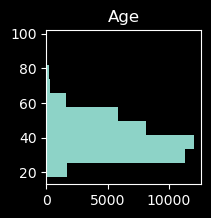

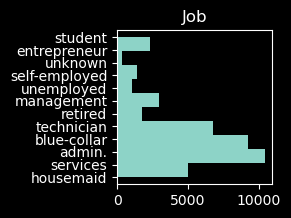

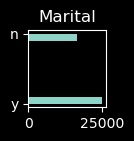

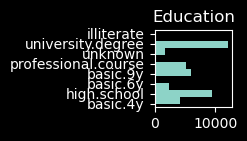

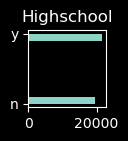

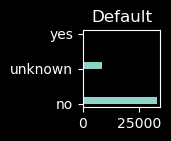

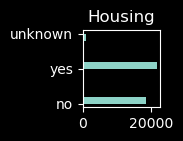

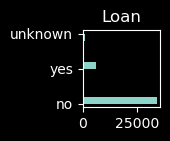

In [3]:
fig, axs = plt.subplots(figsize=(2, 2))
axs.hist(data['age'], orientation="horizontal")
plt.title('Age')
plt.show()

fig, axs = plt.subplots(figsize=(2, 2))
axs.hist(data['job'], orientation="horizontal")
plt.title('Job')
plt.show()

fig, axs = plt.subplots(figsize=(1, 1))
axs.hist(data['marital'], orientation="horizontal")
plt.title('Marital')
plt.show()

fig, axs = plt.subplots(figsize=(1, 1))
axs.hist(data['education'], orientation="horizontal")
plt.title('Education')
plt.show()

fig, axs = plt.subplots(figsize=(1, 1))
axs.hist(data['highschool'], orientation="horizontal")
plt.title('Highschool')
plt.show()

fig, axs = plt.subplots(figsize=(1, 1))
axs.hist(data['default'], orientation="horizontal")
plt.title('Default')
plt.show()

fig, axs = plt.subplots(figsize=(1, 1))
axs.hist(data['housing'], orientation="horizontal")
plt.title('Housing')
plt.show()

fig, axs = plt.subplots(figsize=(1, 1))
axs.hist(data['loan'], orientation="horizontal")
plt.title('Loan')
plt.show()

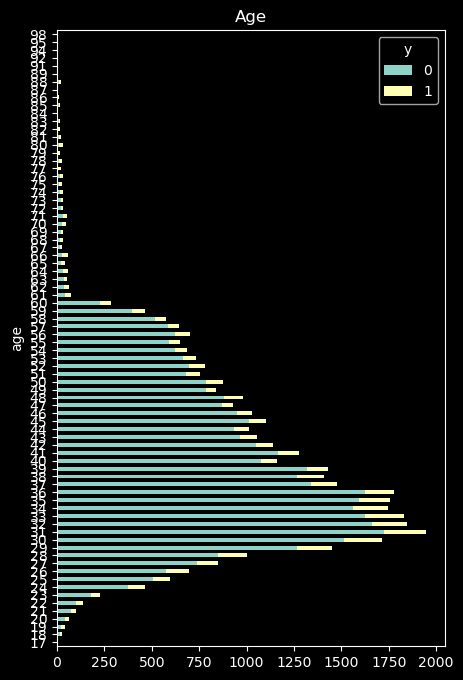

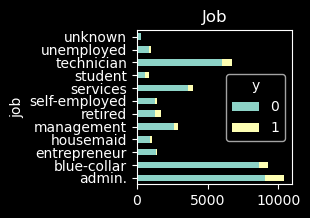

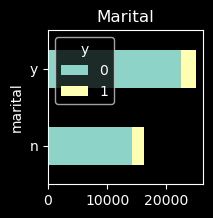

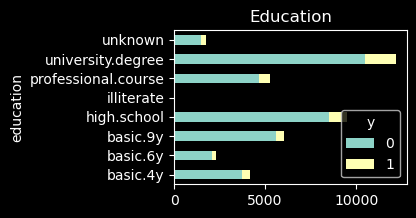

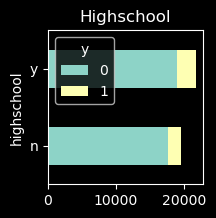

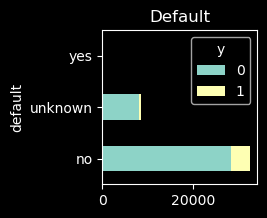

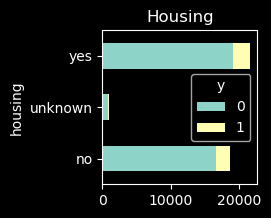

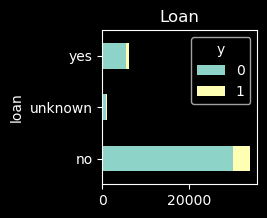

In [4]:
pd.crosstab(data['age'], data['y']).plot.barh(stacked=True, figsize=(5, 8))
plt.title('Age')
plt.show()
pd.crosstab(data['job'], data['y']).plot.barh(stacked=True, figsize=(2, 2))
plt.title('Job')
plt.show()
pd.crosstab(data['marital'], data['y']).plot.barh(stacked=True, figsize=(2, 2))
plt.title('Marital')
plt.show()
pd.crosstab(data['education'], data['y']).plot.barh(stacked=True, figsize=(3, 2))
plt.title('Education')
plt.show()
pd.crosstab(data['highschool'], data['y']).plot.barh(stacked=True, figsize=(2, 2))
plt.title('Highschool')
plt.show()
pd.crosstab(data['default'], data['y']).plot.barh(stacked=True, figsize=(2, 2))
plt.title('Default')
plt.show()
pd.crosstab(data['housing'], data['y']).plot.barh(stacked=True, figsize=(2, 2))
plt.title('Housing')
plt.show()
pd.crosstab(data['loan'], data['y']).plot.barh(stacked=True, figsize=(2, 2))
plt.title('Loan')
plt.show()

In [5]:
data = data[data.age < 60]
data = data[data.job != "unkown"]
data = data[data.job != "student"]
data = data[data.job != "unemployed"]
data = data[data.marital != "unkown"]
data = data[data.education != "illiterate"]
data = data[data.education != "basic.6y"]
data = data[data.education != "unkown"]
data = data[data.default != "yes"]
data = data[data.housing != "unkown"]
data = data[data.loan != "unkown"]

bins = [17, 25, 35, 45, 61]
labels = ['17-25', '25-34', '35-44', '45-60']
data['agerange'] = pd.cut(data.age, bins, labels=labels, include_lowest=True)
display(data)

,age,job,marital,highschool,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agerange
0,56,housemaid,y,n,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,45-60
1,57,services,y,y,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,45-60
2,37,services,y,y,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,35-44
4,56,services,y,y,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,45-60
5,45,services,y,n,basic.9y,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,y,y,university.degree,no,no,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,35-44
41181,37,admin.,y,y,university.degree,no,yes,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,35-44
41184,46,blue-collar,y,n,professional.course,no,no,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,45-60
41185,56,retired,y,y,university.degree,no,yes,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,45-60


In [6]:
display(data)

,age,job,marital,highschool,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,agerange
0,56,housemaid,y,n,basic.4y,no,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,45-60
1,57,services,y,y,high.school,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,45-60
2,37,services,y,y,high.school,no,yes,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,35-44
4,56,services,y,y,high.school,no,no,yes,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,45-60
5,45,services,y,n,basic.9y,unknown,no,no,telephone,may,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,35-44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,36,admin.,y,y,university.degree,no,no,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,35-44
41181,37,admin.,y,y,university.degree,no,yes,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1,35-44
41184,46,blue-collar,y,n,professional.course,no,no,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,45-60
41185,56,retired,y,y,university.degree,no,yes,no,cellular,nov,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0,45-60


In [7]:
data = data[data.y != "n"]

In [8]:
demo_only_input = data[['agerange', 'job', 'marital', 'highschool', 'default',
                        'housing', 'loan']]
target = data['y']

In [9]:
le_age = LabelEncoder()
le_job = LabelEncoder()
le_marital = LabelEncoder()
le_education = LabelEncoder()
le_default = LabelEncoder()
le_housing = LabelEncoder()
le_loan = LabelEncoder()

In [10]:
demo_only_input['age_n'] = le_age.fit_transform(demo_only_input['agerange'])
demo_only_input['job_n'] = le_age.fit_transform(demo_only_input['job'])
demo_only_input['marital_n'] = le_age.fit_transform(demo_only_input['marital'])
demo_only_input['edu_n'] = le_age.fit_transform(demo_only_input['highschool'])
demo_only_input['default_n'] = le_age.fit_transform(demo_only_input['default'])
demo_only_input['housing_n'] = le_age.fit_transform(demo_only_input['housing'])
demo_only_input['loan_n'] = le_age.fit_transform(demo_only_input['loan'])
display(demo_only_input.head(15))

/var/folders/vb/70ntbxb97sxcvsd4gc62mw9c0000gn/T/ipykernel_12898/425589189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_only_input['age_n'] = le_age.fit_transform(demo_only_input['agerange'])
/var/folders/vb/70ntbxb97sxcvsd4gc62mw9c0000gn/T/ipykernel_12898/425589189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_only_input['job_n'] = le_age.fit_transform(demo_only_input['job'])
/var/folders/vb/70ntbxb97sxcvsd4gc62mw9c0000gn/T/ipykernel_12898/425589189.py:3: SettingWithCopyWarning: 
A v

,agerange,job,marital,highschool,default,housing,loan,age_n,job_n,marital_n,edu_n,default_n,housing_n,loan_n
0,45-60,housemaid,y,n,no,no,no,3,3,1,0,0,0,0
1,45-60,services,y,y,unknown,no,no,3,7,1,1,1,0,0
2,35-44,services,y,y,no,yes,no,2,7,1,1,0,2,0
4,45-60,services,y,y,no,no,yes,3,7,1,1,0,0,2
5,35-44,services,y,n,unknown,no,no,2,7,1,0,1,0,0
6,45-60,admin.,y,n,no,no,no,3,0,1,0,0,0,0
7,35-44,blue-collar,y,n,unknown,no,no,2,1,1,0,1,0,0
8,17-25,technician,n,n,no,yes,no,0,8,0,0,0,2,0
9,17-25,services,n,y,no,yes,no,0,7,0,1,0,2,0
10,35-44,blue-collar,y,n,unknown,no,no,2,1,1,0,1,0,0


In [11]:
demo_only_input_n = demo_only_input.drop(['agerange', 'job', 'marital',
                                          'default', 'housing',
                                          'loan', 'default_n', 'housing_n',
                                          'loan_n', 'highschool', 'job_n'], axis=1)
display(demo_only_input_n.head(15))

,age_n,marital_n,edu_n
0,3,1,0
1,3,1,1
2,2,1,1
4,3,1,1
5,2,1,0
6,3,1,0
7,2,1,0
8,0,0,0
9,0,0,1
10,2,1,0


In [12]:
model = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [13]:
model.fit(demo_only_input_n, target)

DecisionTreeClassifier(max_depth=3)

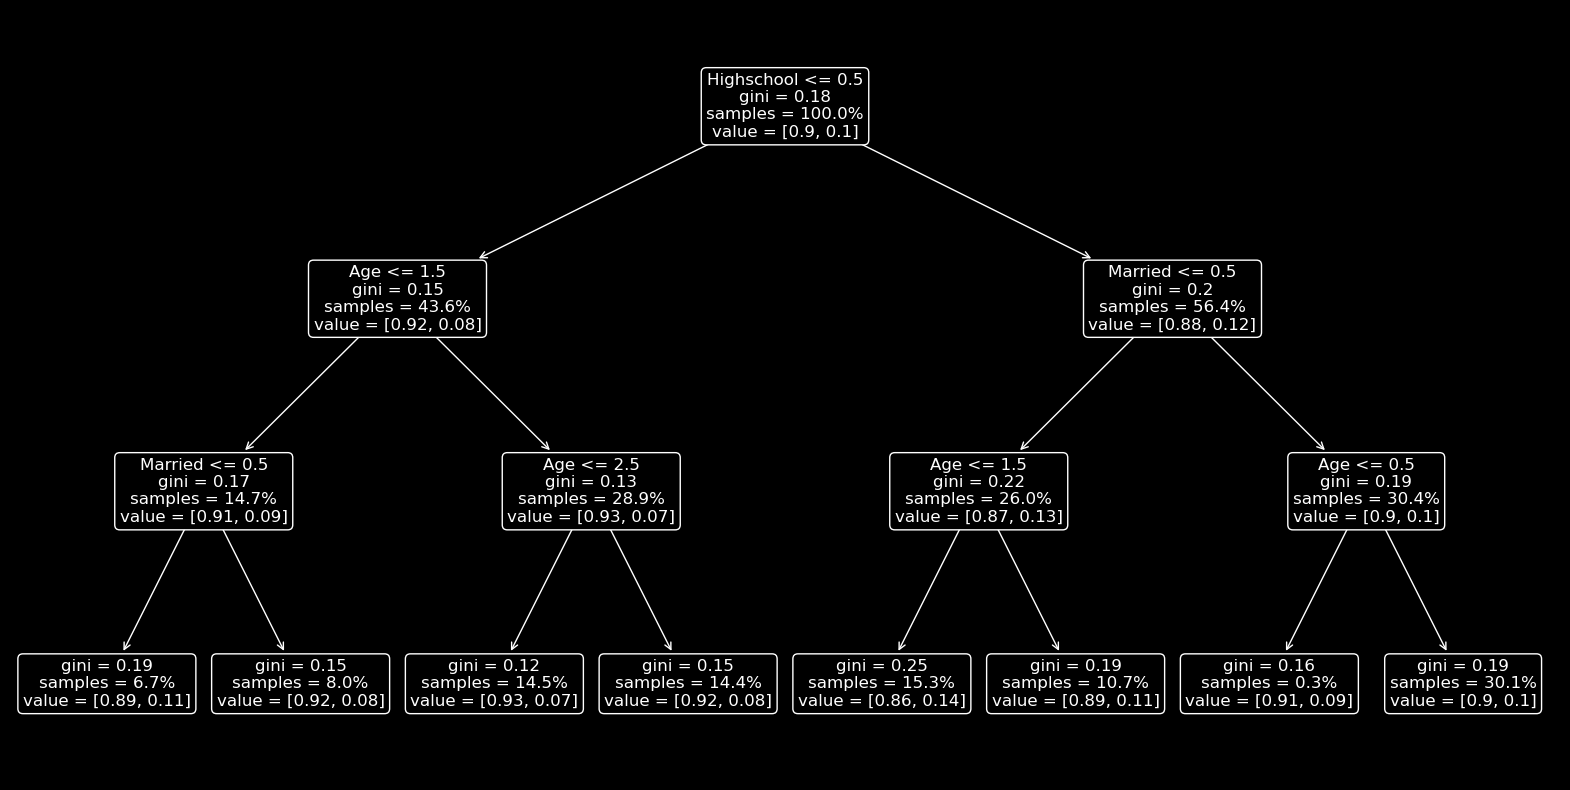

In [14]:
fig, axe = plt.subplots(figsize=(20, 10))
plot_tree(model, ax=axe, fontsize=12, feature_names=['Age', 'Married', 'Highschool'],
          proportion=True, rounded=True, precision=2)
plt.show()